In [1]:
# neccessary imports
import pandas as pd
import numpy as np

In [2]:
# reading the data
data=pd.read_csv('insuranceFraud.csv')

In [3]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
data.size

39000

In [5]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [6]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [8]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [9]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [10]:
# checking for th number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type                 822 non-null object
incident_severity              1000 non-null object
authorities_contacted          1000 non-null object
incident_hour_of_the_day       1000 non-null int64
number_of_vehicle

In [11]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [12]:
# imputing the missing values from the column

data['collision_type']=imputer.fit_transform(data['collision_type'])
data['property_damage']=imputer.fit_transform(data['property_damage'])
data['police_report_available']=imputer.fit_transform(data['police_report_available'])

In [13]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy()

In [14]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [15]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [16]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [17]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [18]:
cat_df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [19]:
cat_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [20]:
cat_df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [21]:
cat_df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [22]:
cat_df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [23]:
cat_df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
cat_df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [25]:
cat_df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [26]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [27]:
cat_df['authorities_contacted'] = cat_df['authorities_contacted'].map({'None' : 1, 'Other' : 2,'Fire':3,'Ambulance':4,'Police':5})
cat_df['insured_occupation'] = cat_df['insured_occupation'].map({'craft-repair':1, 'machine-op-inspct':2, 'sales':3, 'armed-forces':4,'tech-support':5, 'prof-specialty':6, 'other-service':7,'priv-house-serv':8, 'exec-managerial':9, 'protective-serv':10,'transport-moving':11, 'handlers-cleaners':12, 'adm-clerical':13,'farming-fishing':14})
cat_df['collision_type'] = cat_df['collision_type'].map({'Rear Collision' : 1, 'Side Collision' : 2,'Front Collision':3})
cat_df['incident_type'] = cat_df['incident_type'].map({'Single Vehicle Collision' : 1, 'Multi-vehicle Collision' : 2,'Vehicle Theft':3,'Parked Car':4})
cat_df['insured_relationship'] = cat_df['insured_relationship'].map({'not-in-family' : 1, 'other-relative' : 2,'unmarried':3,'own-child':4,'wife':5,'husband':6})

In [28]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,2.5,1,6,1,6,1,2,3,5,1,1,1
1,2.5,1,6,2,2,3,1,2,5,0,0,1
2,1.0,0,7,3,4,2,1,2,5,0,0,0
3,2.5,0,7,4,3,1,3,3,5,0,0,1
4,5.0,1,5,3,3,3,1,2,1,0,0,0


In [29]:
# extracting the numerical columns
num_df = data.select_dtypes(include=['int64']).copy()

In [30]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [31]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [32]:
float_cal= data.select_dtypes(include=['float64']).copy()

In [33]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df,float_cal], axis=1)

In [34]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported,policy_annual_premium
0,328,48,1000,0,53300,0,5,1,1,2,...,1,6,1,2,3,5,1,1,1,1406.91
1,228,42,2000,5000000,0,0,8,1,0,0,...,2,2,3,1,2,5,0,0,1,1197.22
2,134,29,2000,5000000,35100,0,7,3,2,3,...,3,4,2,1,2,5,0,0,0,1413.14
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,4,3,1,3,3,5,0,0,1,1415.74
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,3,3,3,1,2,1,0,0,0,1583.91


In [35]:
final_df.size

27000

In [36]:
#Save to local 
final_df.to_csv(r'C:\Users\Laptop\Desktop\vivek\ML Project\InsuranceFraud_Detection\final_df.csv')

In [37]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [38]:
import matplotlib.pyplot as plt
%matplotlib  inline


Bad key "text.kerning_factor" on line 4 in
c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

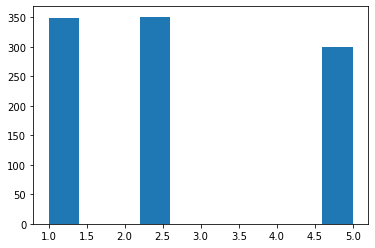

In [39]:
# we'll look at the distribution of data in some columns now
plt.hist(final_df['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

In [40]:
import seaborn as sns

c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


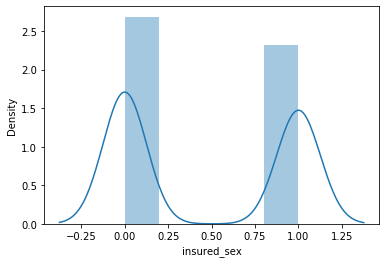

In [41]:
sns.distplot(final_df['insured_sex'])
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


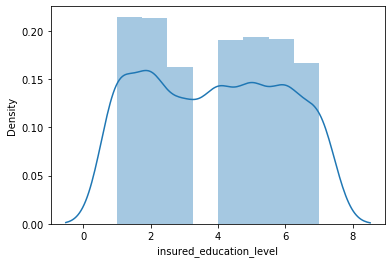

In [42]:
sns.distplot(final_df['insured_education_level'])
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


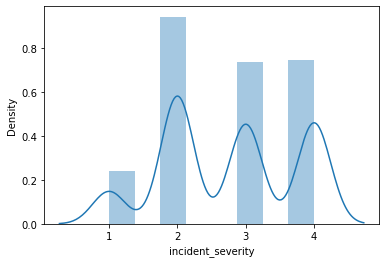

In [43]:
sns.distplot(final_df['incident_severity'])

We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.


c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


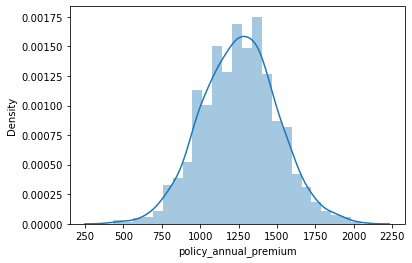

In [44]:
sns.distplot(final_df['policy_annual_premium'])

In [45]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


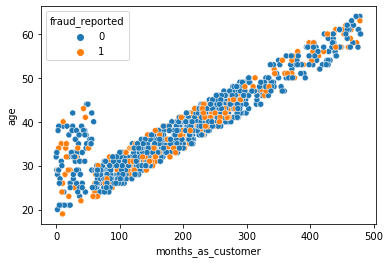

In [46]:
sns.scatterplot(final_df['months_as_customer'],final_df['age'], hue=final_df['fraud_reported'] )


From the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. 


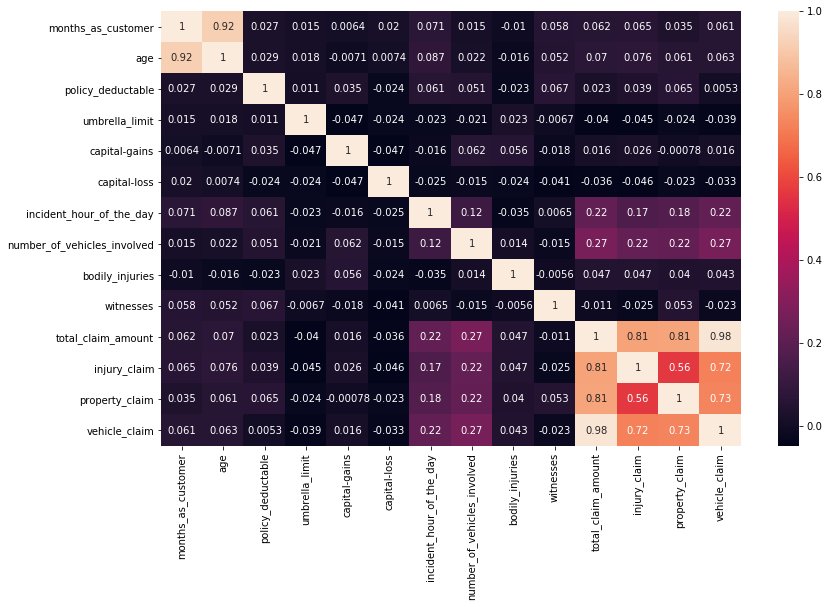

In [47]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.